In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3

%matplotlib inline

In [35]:
# Create a connection to the SQLite database
conn = sqlite3.connect('../Data/db/fraude_detection_warehouse.db')

In [36]:
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
0,c97933246a82467a9cfb40ab1d612897,bfac7b9b0f9c4c2b92124cf5f9bac2c2,c2e3ea31-d1a5-4d65-a9f8-8b3b733a33b4,transfert,2005-08-23,réussie,0,Buea,39328.354516
1,93fbfd13f9b34e0d9820b8731340aa40,e7506952844a4d38be9379d7580e4c25,2beb8b14-8655-4b71-a925-ef4ba64b2295,retrait,2005-03-31,réussie,1,Douala,29158.648865
2,2ae38ab84eec4dad879cc457ffe0c954,913098ce3c834dbbb199ebdf11ac1955,ef66fa7d-0f58-43dd-aa29-aa9af742a86c,transfert,2011-12-17,réussie,0,Garoua,85552.540513
3,fa94fac99017496b9c8139c474a9b1da,42b6a8b5a41845ceaa50554faaa9610b,d676bb76-3798-49d9-83c6-a7d8d20c4302,depôt,2014-03-10,réussie,1,Yaoundé,79321.951234
4,8bbb805c101b420793a3b51b22766613,5d5cc9db27534a6aaa5434114c6b6c3a,e8a74deb-98e4-46d8-8dd6-57a0beaad69e,retrait,2014-03-11,échouée,1,Douala,4289.345369


In [37]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  object 
 1   customer_id       100000 non-null  object 
 2   device_id         100000 non-null  object 
 3   transaction_type  100000 non-null  object 
 4   transaction_date  100000 non-null  object 
 5   status            100000 non-null  object 
 6   is_fraud          100000 non-null  int64  
 7   location          100000 non-null  object 
 8   amount            100000 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [38]:
transactions.describe(include="all")

,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
count,100000,100000,100000,100000,100000,100000,100000.000000,100000,1.000000e+05
unique,100000,10000,63235,3,6938,2,NaN,102,NaN
top,c97933246a82467a9cfb40ab1d612897,493b54e9a7904f23a78a1b77b89c2ba9,4387cb60-4d7d-4b7a-ba87-3551bf77cbcc,depôt,2013-05-02,réussie,NaN,Douala,NaN
freq,1,24,8,50052,31,89877,NaN,11422,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.339530,NaN,4.467785e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,0.473552,NaN,1.317093e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000807e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,3.592390e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,7.152643e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.802462e+05


changing date type

In [39]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    100000 non-null  object        
 1   customer_id       100000 non-null  object        
 2   device_id         100000 non-null  object        
 3   transaction_type  100000 non-null  object        
 4   transaction_date  100000 non-null  datetime64[ns]
 5   status            100000 non-null  object        
 6   is_fraud          100000 non-null  int64         
 7   location          100000 non-null  object        
 8   amount            100000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 6.9+ MB


### transaction_type

<Axes: xlabel='transaction_type', ylabel='count'>

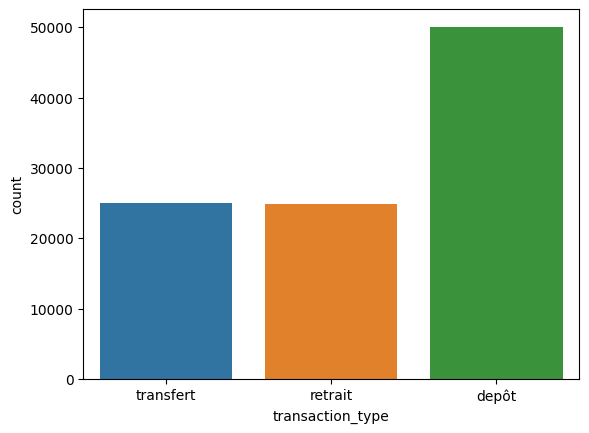

In [40]:
sns.countplot(transactions, x="transaction_type", hue='transaction_type')

In [41]:
transactions.transaction_type.value_counts().sort_values()

transaction_type
retrait      24905
transfert    25043
depôt        50052
Name: count, dtype: int64

In [42]:
length = transactions.shape[0]
# create dataframe percentage of transaction type
proportion = pd.DataFrame(transactions['transaction_type'].value_counts(normalize=True)*100)
proportion

,proportion
transaction_type,
depôt,50.052
transfert,25.043
retrait,24.905


### transaction amount

In [43]:
# transaction amount by transaction type
pd.DataFrame(transactions.groupby('transaction_type').amount.aggregate(['mean', 'median']))

,mean,median
transaction_type,,
depôt,445528.337214,71802.280615
retrait,451907.168382,71698.048334
transfert,444176.541737,70799.786992


In [44]:
transfert = transactions[transactions.transaction_type == 'transfert']
depot = transactions[transactions.transaction_type == 'depôt']
retrait = transactions[transactions.transaction_type == 'retrait']
type_list = [transfert, depot, retrait]


<Axes: xlabel='amount', ylabel='Count'>

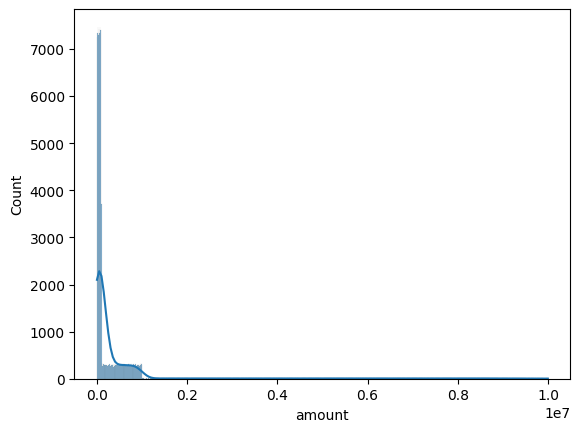

In [45]:
sns.histplot(transactions, x="amount", kde=True)

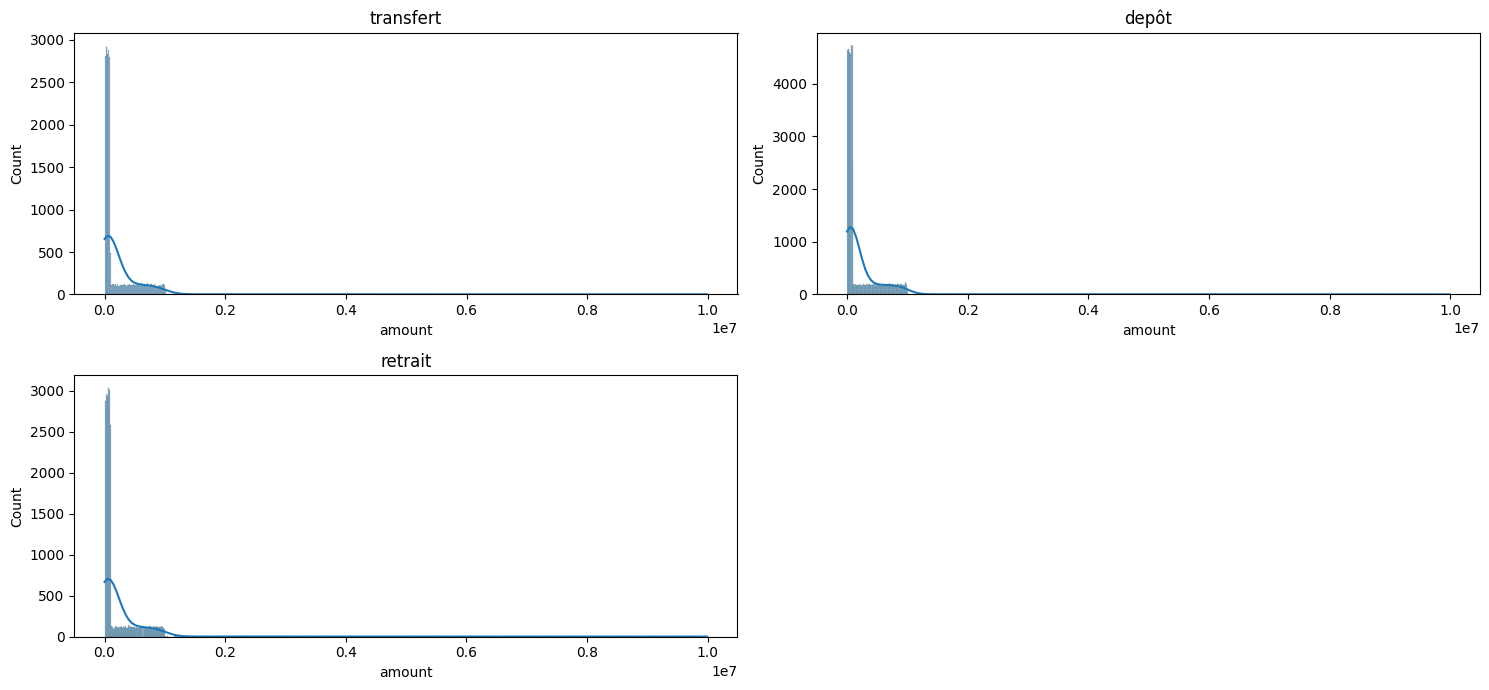

In [46]:
plt.figure(figsize=(15,7))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.histplot(value, x='amount', kde=True)
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

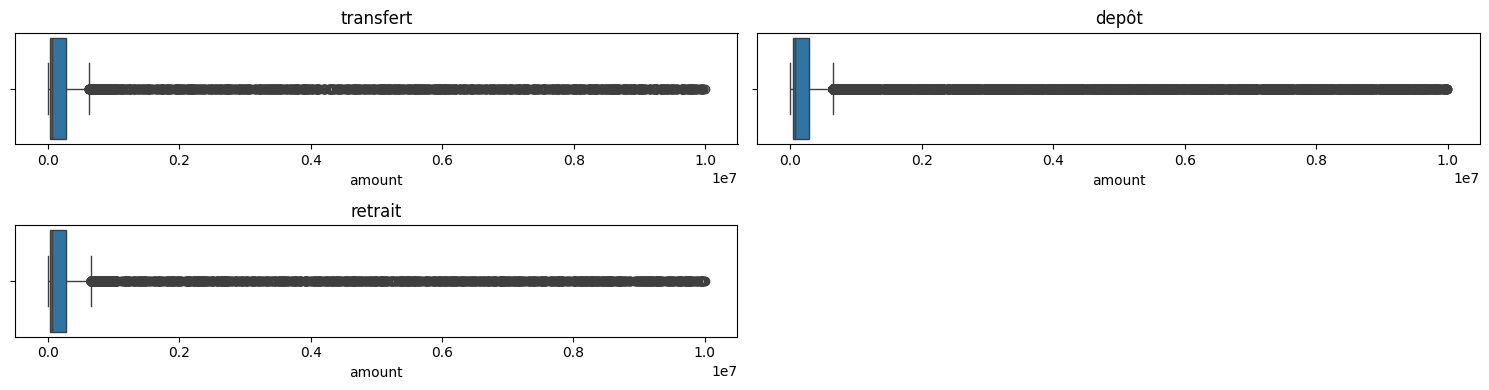

In [47]:
plt.figure(figsize=(15,4))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.boxplot(value, x='amount')
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

### Analyse temporelle

In [48]:
transactions['month'] = pd.to_datetime(transactions['transaction_date'].dt.strftime('%Y-%m'))
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions['month_number'] = transactions['transaction_date'].dt.month
transactions['year'] = transactions['transaction_date'].dt.year

In [49]:
transactions_copy = transactions.set_index('transaction_date')
transactions_copy.head()

,transaction_id,customer_id,device_id,transaction_type,status,is_fraud,location,amount,month,week,month_number,year
transaction_date,,,,,,,,,,,,
2005-08-23,c97933246a82467a9cfb40ab1d612897,bfac7b9b0f9c4c2b92124cf5f9bac2c2,c2e3ea31-d1a5-4d65-a9f8-8b3b733a33b4,transfert,réussie,0,Buea,39328.354516,2005-08-01,34,8,2005
2005-03-31,93fbfd13f9b34e0d9820b8731340aa40,e7506952844a4d38be9379d7580e4c25,2beb8b14-8655-4b71-a925-ef4ba64b2295,retrait,réussie,1,Douala,29158.648865,2005-03-01,13,3,2005
2011-12-17,2ae38ab84eec4dad879cc457ffe0c954,913098ce3c834dbbb199ebdf11ac1955,ef66fa7d-0f58-43dd-aa29-aa9af742a86c,transfert,réussie,0,Garoua,85552.540513,2011-12-01,50,12,2011
2014-03-10,fa94fac99017496b9c8139c474a9b1da,42b6a8b5a41845ceaa50554faaa9610b,d676bb76-3798-49d9-83c6-a7d8d20c4302,depôt,réussie,1,Yaoundé,79321.951234,2014-03-01,11,3,2014
2014-03-11,8bbb805c101b420793a3b51b22766613,5d5cc9db27534a6aaa5434114c6b6c3a,e8a74deb-98e4-46d8-8dd6-57a0beaad69e,retrait,échouée,1,Douala,4289.345369,2014-03-01,11,3,2014


Montant de transaction par jour

In [50]:
transactions_per_day = pd.DataFrame(transactions_copy.groupby('transaction_date').amount.aggregate("mean")).reset_index()
fig = px.line(transactions_per_day, x='transaction_date', y='amount', title='transactions_per_day amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par mois

In [51]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("month").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='month', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par an

In [52]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("year").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='year', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par jour

In [53]:
transactions_per_day_nbr = pd.DataFrame(transactions_copy.groupby("transaction_date").transaction_id.count()).reset_index()
fig = px.line(transactions_per_day_nbr, x='transaction_date', y='transaction_id', title='transactions_per_day_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par mois

In [54]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("month").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='month', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par an

In [55]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("year").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='year', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)